# Visualize the results

Here, we load the results for the total of 448 settings (combinations of test fraction, lambda and noise) and we plot the effect of regularization on the test RMSE.

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import glob
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util import set_default_style


In [2]:
files = glob.glob("results/result_*.json")
data_list = []
for filename in files:
    print(filename)
    with open(filename, 'r') as f:
        # Each file has a single JSON line
        record = json.load(f)
        data_list.append(record)

df = pd.DataFrame(data_list)

results/result_352.json
results/result_217.json
results/result_305.json
results/result_78.json
results/result_97.json
results/result_240.json
results/result_169.json
results/result_186.json
results/result_313.json
results/result_256.json
results/result_81.json
results/result_190.json
results/result_39.json
results/result_344.json
results/result_201.json
results/result_128.json
results/result_295.json
results/result_42.json
results/result_446.json
results/result_153.json
results/result_387.json
results/result_368.json
results/result_15.json
results/result_411.json
results/result_104.json
results/result_391.json
results/result_407.json
results/result_112.json
results/result_54.json
results/result_329.json
results/result_283.json
results/result_145.json
results/result_132.json
results/result_427.json
results/result_23.json
results/result_165.json
results/result_74.json
results/result_309.json
results/result_173.json
results/result_62.json
results/result_124.json
results/result_431.json
re

In [3]:
df[(df.noise==0.1) & (df.test_frac==0.9)].sort_values(by="rmse")

,task_id,noise,test_frac,lambd,rmse,rmse_impute
387,188,0.1,0.9,1.00,2.275420,6.768697
109,187,0.1,0.9,0.50,2.277620,6.768697
397,189,0.1,0.9,2.00,5.448165,6.768697
424,185,0.1,0.9,0.01,5.590915,6.768697
361,184,0.1,0.9,0.00,5.676527,6.768697
7,186,0.1,0.9,0.10,5.786061,6.768697
104,191,0.1,0.9,10.00,7.059839,6.768697
11,190,0.1,0.9,5.00,7.059839,6.768697


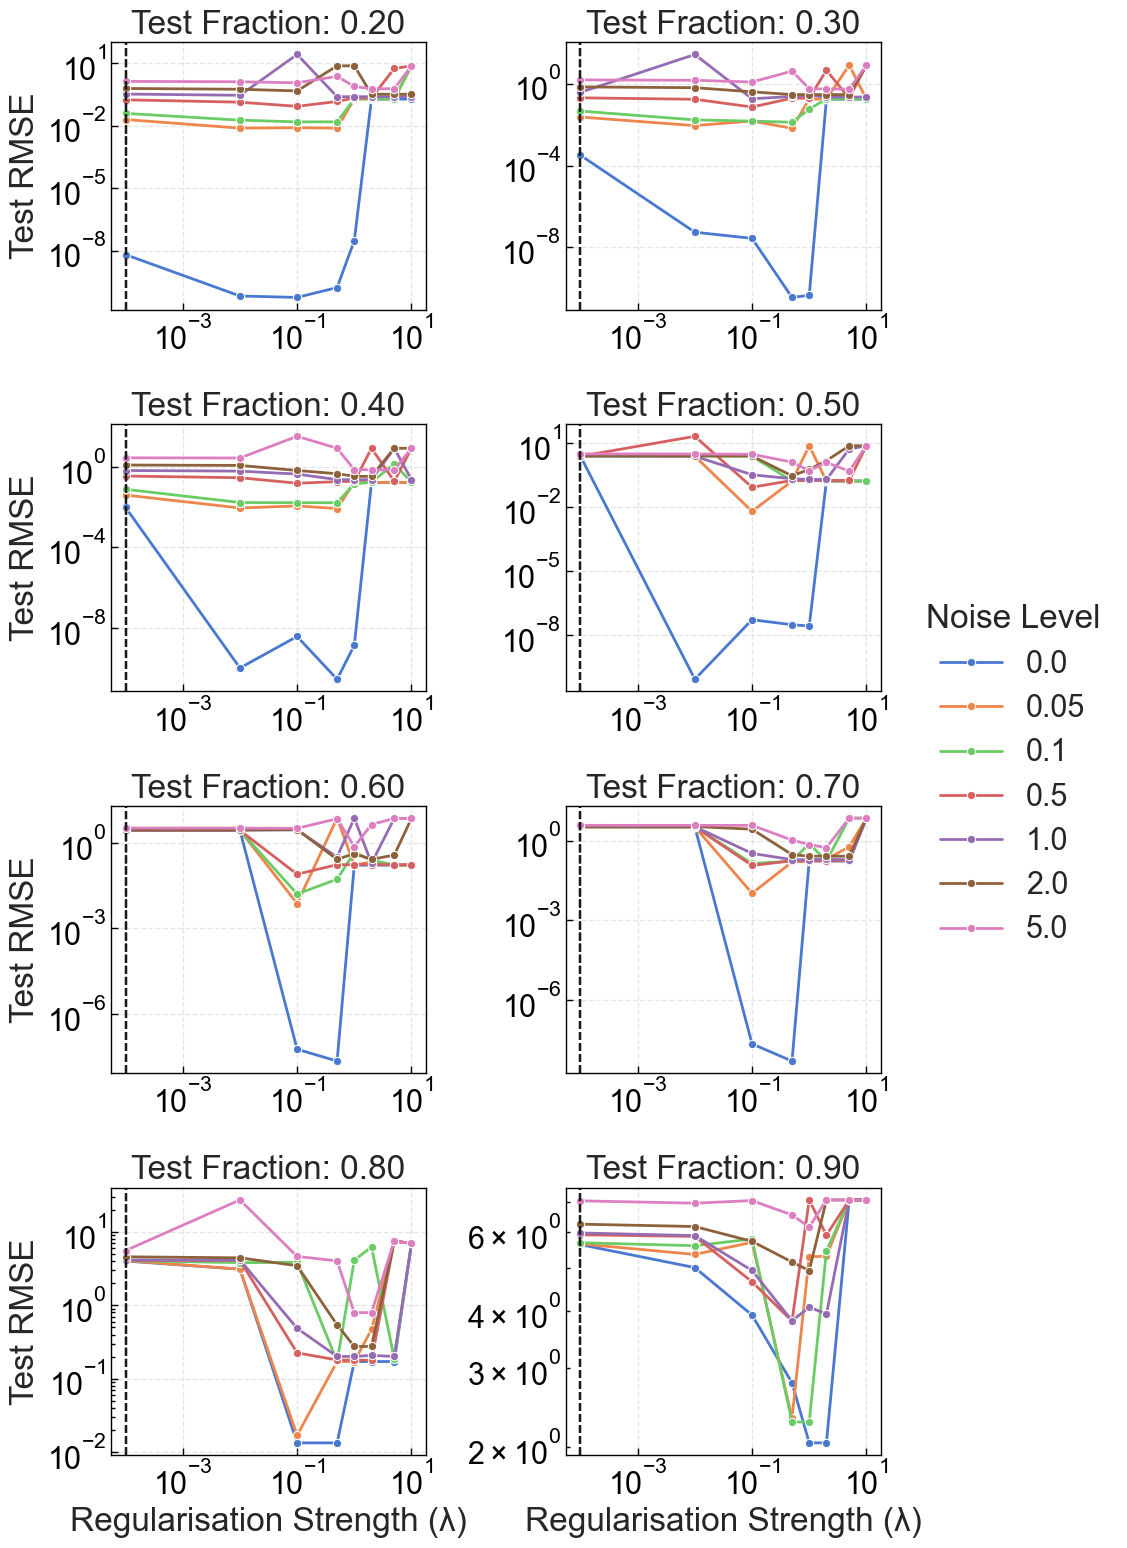

In [4]:
set_default_style(font_scale=2)

lmbd_zero = 1e-4

# Replace λ=0 with 1e-4 for plotting in logscale
plot_df = df[df.test_frac <= 0.95].copy()
plot_df["plot_lambd"] = plot_df["lambd"].replace(0, lmbd_zero)

# Create a FacetGrid using plot_df, colored by 'noise'
g = sns.FacetGrid(
    plot_df,
    col="test_frac",
    hue="noise",
    col_wrap=2,
    height=4,
    aspect=1.20,
    sharey=False,
    sharex=False,
    legend_out=True,
    despine=False,
)

# Plot RMSE vs plot_lambd with markers
g.map(sns.lineplot, "plot_lambd", "rmse", marker="o", lw=2)

# Compute baseline errors from the original df (where λ == 0)
baseline_errors = df[df["lambd"] == 0].groupby("test_frac")["rmse"].mean()

def add_baseline(data, **kwargs):
    test_frac = data["test_frac"].iloc[0]
    if test_frac in baseline_errors.index:
        ax = plt.gca()
        baseline_val = baseline_errors[test_frac]
        ax.axvline(x=lmbd_zero, color="k", linestyle="--")

# Add baseline annotation to each facet
g.map_dataframe(add_baseline)

# Set logarithmic scales for both axes
g.set(xscale="log")
g.set(yscale="log")

# Add legend, axis labels, and overall title
g.add_legend(title="Noise Level")
g.set_axis_labels("Regularisation Strength (λ)", "Test RMSE")

# **Set custom titles for each subplot**
g.set_titles(col_template="Test Fraction: {col_name:.2f}")

# Adjust layout and display the plot
g.tight_layout()

plt.savefig("figures/flux_fitting.pdf", format="pdf")

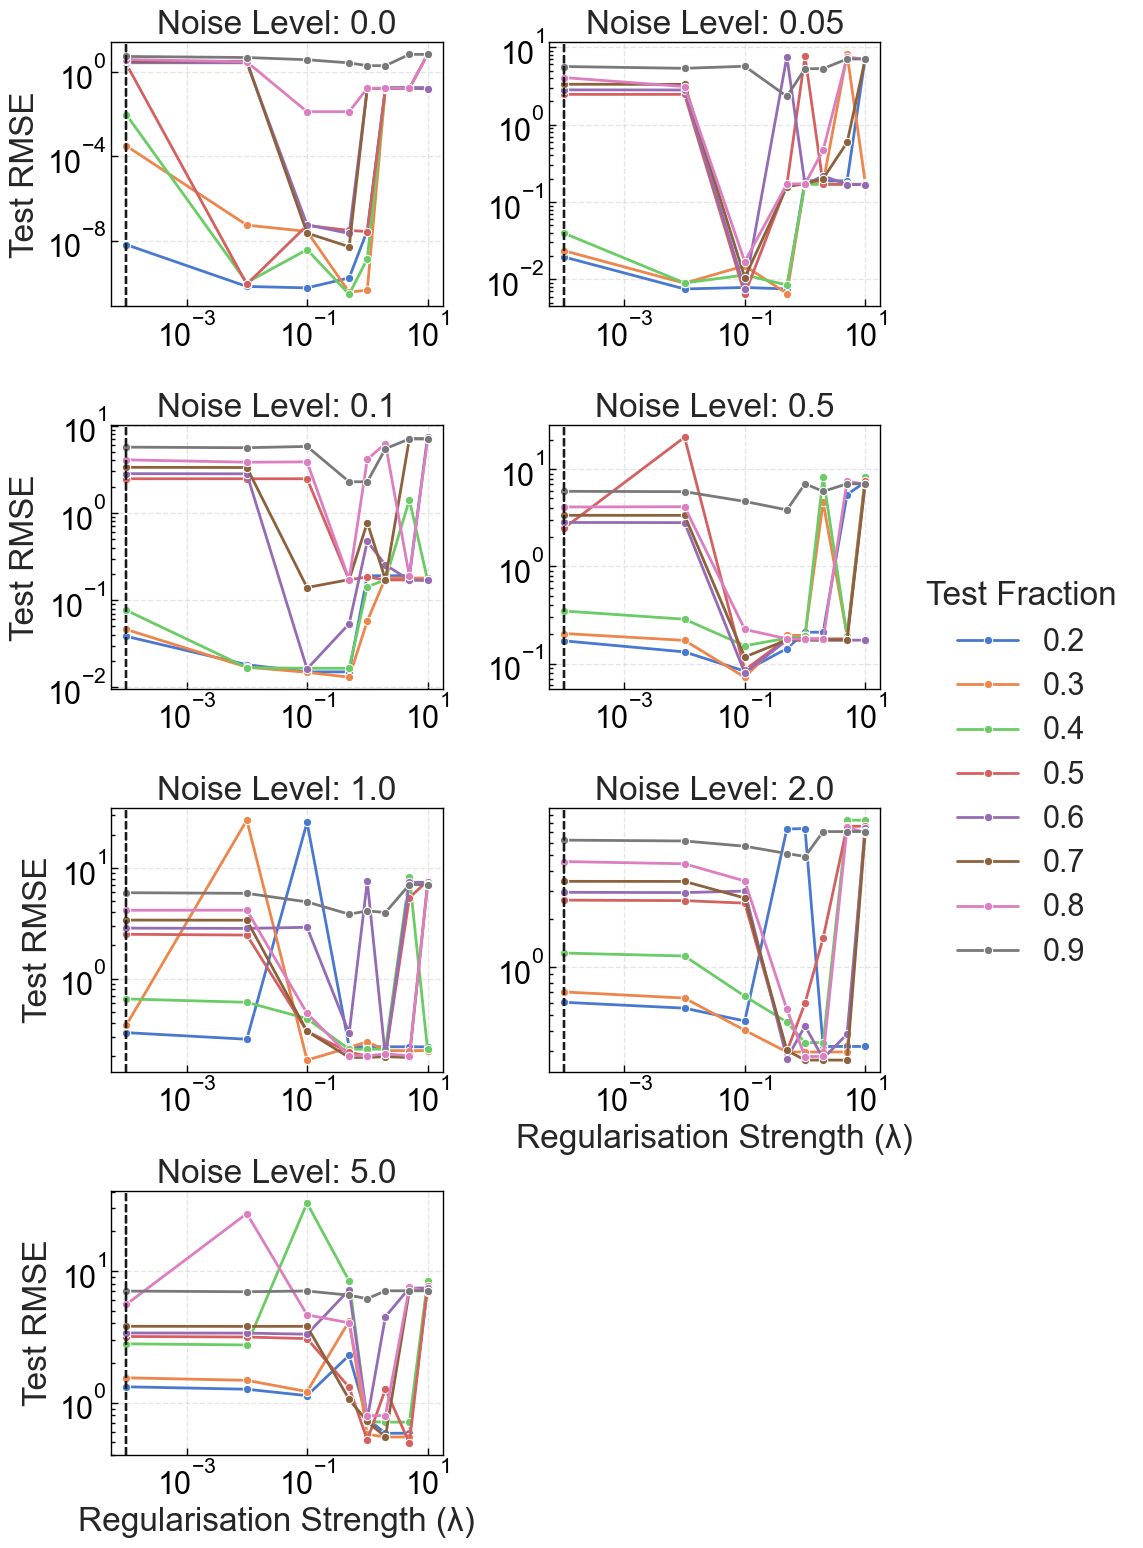

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

set_default_style(font_scale=2)

lmbd_zero = 1e-4

# Prepare the DataFrame
plot_df = df[df.test_frac <= 0.95].copy()
plot_df["plot_lambd"] = plot_df["lambd"].replace(0, lmbd_zero)

# Compute baseline errors from the original df (for reference, if you ever want to plot horizontal lines)
baseline_errors = df[df["lambd"] == 0].groupby("test_frac")["rmse"].mean()

# Create a FacetGrid: columns = noise levels, hue = test fractions
g = sns.FacetGrid(
    plot_df,
    col="noise",
    hue="test_frac",
    col_wrap=2,
    height=4,
    aspect=1.2,
    sharey=False,
    sharex=False,
    legend_out=True,
    despine=False,
)

# Plot RMSE vs λ
g.map(sns.lineplot, "plot_lambd", "rmse", marker="o", lw=2)

# Add a vertical dashed line at the λ≈0 substitute in every facet
def add_baseline(data, **kwargs):
    ax = plt.gca()
    ax.axvline(x=lmbd_zero, color="k", linestyle="--")

g.map_dataframe(add_baseline)

# Log scales
g.set(xscale="log", yscale="log")

# Legend and labels
g.add_legend(title="Test Fraction")
g.set_axis_labels("Regularisation Strength (λ)", "Test RMSE")

# Custom facet titles
g.set_titles(col_template="Noise Level: {col_name}")

# Tight layout and save
g.tight_layout()
plt.savefig("figures/flux_fitting_by_noise.pdf", format="pdf")
plt.show()
